<a href="https://colab.research.google.com/github/alessandra-cardozo/phyton-para-Database/blob/main/Imers%C3%A3o_Alessandra_Agentes_de_IA_Alura%2BGoogle_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install -q --upgrade langchain langchain-google-genai google-generativeai==0.8.5

In [19]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')

In [20]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    api_key=GOOGLE_API_KEY
)

In [21]:
resp_test = llm.invoke("O que é inteligência artificial?")


In [22]:
print(resp_test)

content='A **Inteligência Artificial (IA)** é um campo da ciência da computação que se dedica a criar sistemas ou máquinas capazes de simular a inteligência humana. O objetivo principal é permitir que essas máquinas percebam, raciocinem, aprendam, resolvam problemas e tomem decisões de forma autônoma, ou seja, sem serem explicitamente programadas para cada tarefa específica.\n\nEm termos mais simples, a IA busca fazer com que computadores e softwares pensem e ajam de maneira "inteligente", similar aos seres humanos.\n\n### O que a IA faz? (Capacidades Principais)\n\n1.  **Aprendizado (Machine Learning):** A capacidade de aprender com dados e experiências, identificar padrões e fazer previsões ou tomar decisões sem ser explicitamente programada para cada cenário.\n2.  **Raciocínio:** A habilidade de usar lógica e regras para resolver problemas e tirar conclusões.\n3.  **Percepção:** A capacidade de interpretar informações do ambiente, como imagens (visão computacional) e sons (reconheci

In [23]:
TRIAGEM_PROMPT = (
    "Você é um triador de Service Desk para políticas internas da empresa Alessandra Desenvolvimento. "
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "{\n"
    '  "decisao": "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO",\n'
    '  "urgencia": "BAIXA" | "MEDIA" | "ALTA",\n'
    '  "campos_faltantes": ["..."]\n'
    "}\n"
    "Regras:\n"
    '- **AUTO_RESOLVER**: Perguntas claras sobre regras ou procedimentos descritos nas políticas (Ex: "Posso reembolsar a internet do meu home office?", "Como funciona a política de alimentação em viagens?").\n'
    '- **PEDIR_INFO**: Mensagens vagas ou que faltam informações para identificar o tema ou contexto (Ex: "Preciso de ajuda com uma política", "Tenho uma dúvida geral").\n'
    '- **ABRIR_CHAMADO**: Pedidos de exceção, liberação, aprovação ou acesso especial, ou quando o usuário explicitamente pede para abrir um chamado (Ex: "Quero exceção para trabalhar 5 dias remoto.", "Solicito liberação para anexos externos.", "Por favor, abra um chamado para o RH.").'
    "Analise a mensagem e decida a ação mais apropriada."
)

In [24]:
from pydantic import BaseModel, Field
from typing import Literal, List, Dict

class TriagemOut(BaseModel):
    decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"]
    urgencia: Literal["BAIXA", "MEDIA", "ALTA"]
    campos_faltantes: List[str] = Field(default_factory=list)

In [25]:
llm_triagem = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.0,
    api_key=GOOGLE_API_KEY
)

In [26]:
from langchain_core.messages import SystemMessage, HumanMessage

triagem_chain = llm_triagem.with_structured_output(TriagemOut)

def triagem(mensagem: str) -> Dict:
    saida: TriagemOut = triagem_chain.invoke([
        SystemMessage(content=TRIAGEM_PROMPT),
        HumanMessage(content=mensagem)
    ])

    return saida.model_dump()

In [27]:
testes = ["Posso reembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos da Alura?",
          "Quantas capivaras tem no Rio Pinheiros?"]

In [28]:
for msg_teste in testes:
    print(f"Pergunta: {msg_teste}\n -> Resposta: {triagem(msg_teste)}\n")


Pergunta: Posso reembolsar a internet?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quero mais 5 dias de trabalho remoto. Como faço?
 -> Resposta: {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'MEDIA', 'campos_faltantes': []}

Pergunta: Posso reembolsar cursos ou treinamentos da Alura?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quantas capivaras tem no Rio Pinheiros?
 -> Resposta: {'decisao': 'PEDIR_INFO', 'urgencia': 'BAIXA', 'campos_faltantes': []}



AULA 02

In [29]:
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

In [35]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

docs = []
# Altere o caminho do arquivo para o seu novo currículo
file_path = "/content/CURRICULO 07 DE SETEMBRO - ULTIMO.pdf"  # Caminho para o novo arquivo PDF

try:
    loader = PyMuPDFLoader(file_path)
    docs.extend(loader.load())
    print(f"Carregado com sucesso arquivo {Path(file_path).name}")
except Exception as e:
    print(f"Erro ao carregar arquivo {Path(file_path).name}: {e}")

print(f"Total de documentos carregados: {len(docs)}")


Carregado com sucesso arquivo CURRICULO 07 DE SETEMBRO - ULTIMO.pdf
Total de documentos carregados: 5


In [36]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)

chunks = splitter.split_documents(docs)

In [37]:
for chunk in chunks:
    print(chunk)
    print("------------------------------------")

page_content='Perfil profissional: Experiência de 8 anos na área de seguros. Sólidos
conhecimentos em apólices, sinistros e rotinas administrativas. Alta
capacidade de comunicação. Experiência de 12 anos na indústria de
embalagens. Promovida para área comercial e administrativa. Vivência' metadata={'producer': 'Skia/PDF m128', 'creator': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/128.0.0.0 Safari/537.36', 'creationdate': '2025-09-07T23:08:55+00:00', 'source': '/content/CURRICULO 07 DE SETEMBRO - ULTIMO.pdf', 'file_path': '/content/CURRICULO 07 DE SETEMBRO - ULTIMO.pdf', 'total_pages': 5, 'format': 'PDF 1.4', 'title': 'Vagas de Emprego Grátis | Infojobs', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2025-09-07T23:08:55+00:00', 'trapped': '', 'modDate': "D:20250907230855+00'00'", 'creationDate': "D:20250907230855+00'00'", 'page': 0}
------------------------------------
page_content='abrangente das rotinas de atendimento, v

In [38]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",
    google_api_key=GOOGLE_API_KEY
)

In [39]:
from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(chunks, embeddings)

retriever = vectorstore.as_retriever(search_type="similarity_score_threshold",
                                     search_kwargs={"score_threshold":0.3, "k": 4})

In [41]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt_rag = ChatPromptTemplate.from_messages([
    ("system",
     "Você é um Assistente que responde perguntas com base em um currículo profissional fornecido. "
     "Responda SOMENTE com base no conteúdo do currículo. "
     "Se a informação não estiver no currículo, responda apenas 'Não sei'."),

    ("human", "Pergunta: {input}\n\nContexto:\n{context}")
])

document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag)


In [42]:
# Formatadores
import re, pathlib

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

In [43]:
def perguntar_politica_RAG(pergunta: str) -> Dict:
    docs_relacionados = retriever.invoke(pergunta)

    if not docs_relacionados:
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    answer = document_chain.invoke({"input": pergunta,
                                    "context": docs_relacionados})

    txt = (answer or "").strip()

    if txt.rstrip(".!?") == "Não sei":
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    return {"answer": txt,
            "citacoes": formatar_citacoes(docs_relacionados, pergunta),
            "contexto_encontrado": True}

In [44]:
testes = [
    "Qual é o nome completo da pessoa no currículo?",
    "Qual é a formação acadêmica listada?",
    "Quais são as experiências profissionais mencionadas?",
    "A pessoa possui habilidades técnicas ou certificações?",
    "Quantos anos de experiência profissional ela tem?",
    "Existe alguma informação sobre idiomas ou proficiência linguística?"
]


In [45]:
for msg_teste in testes:
    resposta = perguntar_politica_RAG(msg_teste)
    print(f"PERGUNTA: {msg_teste}")
    print(f"RESPOSTA: {resposta['answer']}")
    if resposta['contexto_encontrado']:
        print("CITAÇÕES:")
        for c in resposta['citacoes']:
            print(f" - Documento: {c['documento']}, Página: {c['pagina']}")
            print(f"   Trecho: {c['trecho']}")
        print("------------------------------------")

PERGUNTA: Qual é o nome completo da pessoa no currículo?
RESPOSTA: Alessandra Cardozo dos Santos
CITAÇÕES:
 - Documento: CURRICULO 07 DE SETEMBRO - ULTIMO.pdf, Página: 1
   Trecho: Cardozo dos Santos, 50 anos Avenida das Cerejeiras - de ao fim, 2310, Jardim Japão, 02124-002, São Paulo - SP alessandra
------------------------------------
PERGUNTA: Qual é a formação acadêmica listada?
RESPOSTA: A formação acadêmica listada é Ensino Superior em Gestão Financeira, cursado nas Faculdades Oswaldo Cruz, em São Paulo, de 02/2003 a 12/2005.
CITAÇÕES:
 - Documento: CURRICULO 07 DE SETEMBRO - ULTIMO.pdf, Página: 4
   Trecho: São Paulo 07/2024 - 07/2024 Ensino Superior em Gestão Financeira Faculdades Oswaldo Cruz | São Paulo 02/2003 - 12/2005 H
 - Documento: CURRICULO 07 DE SETEMBRO - ULTIMO.pdf, Página: 2
   Trecho: suporte em rotinas de recepção e atendimento telefônico. Formação acadêmica Certificação Oracle foundations Associate Certificação Oracle foundations Associate | São Paulo 07/20
 - Do

In [46]:
# Escolha uma pergunta de teste para ilustrar
pergunta_exemplo = testes[2] # Por exemplo, a terceira pergunta: "Há alguma alteração no fígado?"

print(f"Pergunta de Exemplo: {pergunta_exemplo}\n")

# Passo 1: Recuperar os documentos relevantes (chunks)
print("Passo 1: Recuperando documentos relevantes...")
docs_relevantes = retriever.invoke(pergunta_exemplo)

if docs_relevantes:
    print(f"Encontrados {len(docs_relevantes)} documentos relevantes (chunks):\n")
    for i, doc in enumerate(docs_relevantes):
        print(f"--- Chunk {i+1} (Página: {doc.metadata.get('page', 0)+1}, Documento: {Path(doc.metadata.get('source', '')).name}) ---")
        print(doc.page_content)
        print("-" * (len(f"--- Chunk {i+1} (Página: {doc.metadata.get('page', 0)+1}, Documento: {Path(doc.metadata.get('source', '')).name}) ---")))
    print("\n" + "="*50 + "\n")

    # Passo 2: Gerar a resposta usando os documentos recuperados e o modelo
    print("Passo 2: Gerando a resposta com base nos documentos recuperados e no modelo...")
    resposta_completa = perguntar_politica_RAG(pergunta_exemplo) # Reutiliza a função que já orquestra a cadeia e formatação

    print("\n" + "="*50 + "\n")
    print("Resposta Final Gerada:")
    print(resposta_completa['answer'])

    if resposta_completa['citacoes']:
        print("\nCitações (Referências encontradas no relatório):")
        for cite in resposta_completa['citacoes']:
            print(f" - Documento: {cite['documento']}, Página: {cite['pagina']}")
            print(f"   Trecho: {cite['trecho']}")
else:
    print("Nenhum documento relevante encontrado para esta pergunta.")
    print("\n" + "="*50 + "\n")
    resposta_completa = perguntar_politica_RAG(pergunta_exemplo)
    print("Resposta Final Gerada:")
    print(resposta_completa['answer'])

Pergunta de Exemplo: Quais são as experiências profissionais mencionadas?

Passo 1: Recuperando documentos relevantes...
Encontrados 4 documentos relevantes (chunks):

--- Chunk 1 (Página: 1, Documento: CURRICULO 07 DE SETEMBRO - ULTIMO.pdf) ---
Perfil profissional: Experiência de 8 anos na área de seguros. Sólidos
conhecimentos em apólices, sinistros e rotinas administrativas. Alta
capacidade de comunicação. Experiência de 12 anos na indústria de
embalagens. Promovida para área comercial e administrativa. Vivência
-----------------------------------------------------------------------------
--- Chunk 2 (Página: 2, Documento: CURRICULO 07 DE SETEMBRO - ULTIMO.pdf) ---
Dez/2005):. Desenvolvimento de propostas
comerciais e orçamentos personalizados..
Atendimento direto a clientes, com negociação de
propostas e acompanhamento de
faturamento.Auxiliar de Escritório (Mar/1996 -
Jan/2003):. Gestão de documentação administrativa e
---------------------------------------------------------------

### Ilustração do Processo RAG (Retrieval Augmented Generation)

A célula de código abaixo demonstra o fluxo do seu sistema de perguntas e respostas, mostrando:
1.  A pergunta de exemplo utilizada.
2.  Quais "pedacinhos" (chunks) do documento PDF o sistema encontrou como relevantes.
3.  A resposta final gerada pelo modelo com base nesses pedacinhos e na pergunta.
4.  As referências (citações) de onde a informação foi retirada no documento.

Pense no processo RAG como este fluxo simplificado:

In [47]:
# Escolha uma pergunta de teste para ilustrar
pergunta_exemplo = testes[2] # Por exemplo, a terceira pergunta: "Há alguma alteração no fígado?"

print(f"Pergunta de Exemplo: {pergunta_exemplo}\n")

# Passo 1: Recuperar os documentos relevantes (chunks)
print("Passo 1: Recuperando documentos relevantes...")
docs_relevantes = retriever.invoke(pergunta_exemplo)

if docs_relevantes:
    print(f"Encontrados {len(docs_relevantes)} documentos relevantes (chunks):\n")
    for i, doc in enumerate(docs_relevantes):
        print(f"--- Chunk {i+1} (Página: {doc.metadata.get('page', 0)+1}, Documento: {Path(doc.metadata.get('source', '')).name}) ---")
        print(doc.page_content)
        print("-" * (len(f"--- Chunk {i+1} (Página: {doc.metadata.get('page', 0)+1}, Documento: {Path(doc.metadata.get('source', '')).name}) ---")))
    print("\n" + "="*50 + "\n")

    # Passo 2: Gerar a resposta usando os documentos recuperados e o modelo
    print("Passo 2: Gerando a resposta com base nos documentos recuperados e no modelo...")
    resposta_completa = perguntar_politica_RAG(pergunta_exemplo) # Reutiliza a função que já orquestra a cadeia e formatação

    print("\n" + "="*50 + "\n")
    print("Resposta Final Gerada:")
    print(resposta_completa['answer'])

    if resposta_completa['citacoes']:
        print("\nCitações (Referências encontradas no relatório):")
        for cite in resposta_completa['citacoes']:
            print(f" - Documento: {cite['documento']}, Página: {cite['pagina']}")
            print(f"   Trecho: {cite['trecho']}")
else:
    print("Nenhum documento relevante encontrado para esta pergunta.")
    print("\n" + "="*50 + "\n")
    resposta_completa = perguntar_politica_RAG(pergunta_exemplo)
    print("Resposta Final Gerada:")
    print(resposta_completa['answer'])

Pergunta de Exemplo: Quais são as experiências profissionais mencionadas?

Passo 1: Recuperando documentos relevantes...
Encontrados 4 documentos relevantes (chunks):

--- Chunk 1 (Página: 1, Documento: CURRICULO 07 DE SETEMBRO - ULTIMO.pdf) ---
Perfil profissional: Experiência de 8 anos na área de seguros. Sólidos
conhecimentos em apólices, sinistros e rotinas administrativas. Alta
capacidade de comunicação. Experiência de 12 anos na indústria de
embalagens. Promovida para área comercial e administrativa. Vivência
-----------------------------------------------------------------------------
--- Chunk 2 (Página: 2, Documento: CURRICULO 07 DE SETEMBRO - ULTIMO.pdf) ---
Dez/2005):. Desenvolvimento de propostas
comerciais e orçamentos personalizados..
Atendimento direto a clientes, com negociação de
propostas e acompanhamento de
faturamento.Auxiliar de Escritório (Mar/1996 -
Jan/2003):. Gestão de documentação administrativa e
---------------------------------------------------------------

AULA 03

In [48]:
!pip install -q --upgrade langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 10.3 MB/s eta 0:00:00


In [49]:
from typing import TypedDict, Optional

class AgentState(TypedDict, total = False):
    pergunta: str
    triagem: dict
    resposta: Optional[str]
    citacoes: List[dict]
    rag_sucesso: bool
    acao_final: str

In [50]:
def triagem(pergunta: str) -> dict:
    termos_curriculo = [
        "formação", "experiência", "profissional", "habilidades", "certificações",
        "idiomas", "currículo", "competências", "cargo", "empresa", "anos de experiência",
        "objetivo profissional", "área de atuação"
    ]

    if any(termo in pergunta.lower() for termo in termos_curriculo):
        return {
            "decisao": "AUTO_RESOLVER",
            "urgencia": "BAIXA",
            "acao_final": "AUTO_RESOLVER"
        }

    # Se não reconhecer como relacionado ao currículo, segue o fluxo padrão
    return {
        "decisao": "PEDIR_INFO",
        "urgencia": "BAIXA",
        "acao_final": "PEDIR_INFO"
    }



In [51]:
def node_auto_resolver(state: AgentState) -> AgentState:
    print("Executando nó de auto_resolver...")
    resposta_rag = perguntar_politica_RAG(state["pergunta"])

    update: AgentState = {
        "resposta": resposta_rag["answer"],
        "citacoes": resposta_rag.get("citacoes", []),
        "rag_sucesso": resposta_rag["contexto_encontrado"],
    }

    if resposta_rag["contexto_encontrado"]:
        update["acao_final"] = "AUTO_RESOLVER"

    return update

In [52]:
def node_pedir_info(state: AgentState) -> AgentState:
    print("Executando nó de pedir_info...")
    faltantes = state["triagem"].get("campos_faltantes", [])
    if faltantes:
        detalhe = ",".join(faltantes)
    else:
        detalhe = "Tema e contexto específico"

    return {
        "resposta": f"Para avançar, preciso que detalhe: {detalhe}",
        "citacoes": [],
        "acao_final": "PEDIR_INFO"
    }

In [53]:
def node_abrir_chamado(state: AgentState) -> AgentState:
    print("Executando nó de abrir_chamado...")
    triagem = state["triagem"]

    return {
        "resposta": f"Abrindo chamado com urgência {triagem['urgencia']}. Descrição: {state['pergunta'][:140]}",
        "citacoes": [],
        "acao_final": "ABRIR_CHAMADO"
    }

In [54]:
KEYWORDS_ABRIR_TICKET = ["aprovação", "exceção", "liberação", "abrir ticket", "abrir chamado", "acesso especial"]

def decidir_pos_triagem(state: AgentState) -> str:
    print("Decidindo após a triagem...")
    decisao = state["triagem"]["decisao"]

    if decisao == "AUTO_RESOLVER": return "auto"
    if decisao == "PEDIR_INFO": return "info"
    if decisao == "ABRIR_CHAMADO": return "chamado"

In [55]:
def decidir_pos_auto_resolver(state: AgentState) -> str:
    print("Decidindo após o auto_resolver...")

    if state.get("rag_sucesso"):
        print("Rag com sucesso, finalizando o fluxo.")
        return "ok"

    state_da_pergunta = (state["pergunta"] or "").lower()

    if any(k in state_da_pergunta for k in KEYWORDS_ABRIR_TICKET):
        print("Rag falhou, mas foram encontradas keywords de abertura de ticket. Abrindo...")
        return "chamado"

    print("Rag falhou, sem keywords, vou pedir mais informações...")
    return "info"

In [62]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

# 1. Definição do estado
class AgentState(TypedDict):
    triagem: dict
    pergunta: str
    resposta: str
    rag_sucesso: bool # Adicionado para rastrear o sucesso do RAG

# 2. Carregamento do currículo
docs = []
file_path = "/content/CURRICULO 07 DE SETEMBRO - ULTIMO.pdf"

try:
    loader = PyMuPDFLoader(file_path)
    docs.extend(loader.load())
    print(f"Carregado com sucesso arquivo {Path(file_path).name}")
except Exception as e:
    print(f"Erro ao carregar arquivo {Path(file_path).name}: {e}")

print(f"Total de documentos carregados: {len(docs)}")

# 3. Prompt adaptado para currículo
prompt_rag = ChatPromptTemplate.from_messages([
    ("system",
     "Você é um Assistente que responde perguntas com base em um currículo profissional fornecido. "
     "Responda SOMENTE com base no conteúdo do currículo. "
     "Se a informação não estiver no currículo, responda apenas 'Não sei'."),
    ("human", "Pergunta: {input}\n\nContexto:\n{context}")
])

# 4. Cadeia de documentos
document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag)

# 5. Função de triagem adaptada
def triagem(pergunta: str) -> dict:
    termos_curriculo = [
        "formação", "experiência", "profissional", "habilidades", "certificações",
        "idiomas", "currículo", "competências", "cargo", "empresa", "anos de experiência",
        "objetivo profissional", "área de atuação"
    ]
    if any(termo in pergunta.lower() for termo in termos_curriculo):
        return {
            "decisao": "AUTO_RESOLVER",
            "urgencia": "BAIXA",
            "acao_final": "AUTO_RESOLVER"
        }
    return {
        "decisao": "PEDIR_INFO",
        "urgencia": "BAIXA",
        "acao_final": "PEDIR_INFO"
    }

# 6. Decisão pós-triagem
def decidir_pos_triagem(state: AgentState) -> str:
    print("Decidindo após a triagem...")
    decisao = state["triagem"]["decisao"]
    if decisao == "AUTO_RESOLVER": return "auto"
    if decisao == "PEDIR_INFO": return "info"
    if decisao == "ABRIR_CHAMADO": return "chamado"

# 7. Decisão após auto_resolver
def decidir_pos_auto_resolver(state: AgentState) -> str:
    print("Decidindo após o auto_resolver...")
    resposta = state.get("resposta", "")
    if "Não sei" in resposta:
        print("Rag falhou, sem keywords, vou pedir mais informações...") # Adicionado print para depuração
        return "info"
    print("Rag com sucesso, finalizando o fluxo.") # Adicionado print para depuração
    return "ok"

# 8. Nós do grafo
def node_triagem(state: AgentState) -> AgentState:
    print("Executando nó de triagem...") # Adicionado print para depuração
    pergunta = state["pergunta"]
    state["triagem"] = triagem(pergunta)
    return state

def node_auto_resolver(state: AgentState) -> AgentState:
    print("Executando nó de auto_resolver...") # Adicionado print para depuração
    pergunta = state["pergunta"]
    # Modificado para usar diretamente a string retornada pela cadeia de documentos
    resposta = document_chain.invoke({"input": pergunta, "context": docs})
    state["resposta"] = resposta # Assign the string output directly
    state["rag_sucesso"] = "Não sei" not in resposta # Determina sucesso do RAG
    return state

def node_pedir_info(state: AgentState) -> AgentState:
    print("Executando nó de pedir_info...") # Adicionado print para depuração
    state["resposta"] = "Preciso de mais informações para responder."
    return state

def node_abrir_chamado(state: AgentState) -> AgentState:
    print("Executando nó de abrir_chamado...") # Adicionado print para depuração
    state["resposta"] = "Abrindo chamado para análise manual."
    return state

# 9. Construção do grafo
workflow = StateGraph(AgentState)
workflow.add_node("triagem", node_triagem)
workflow.add_node("auto_resolver", node_auto_resolver)
workflow.add_node("pedir_info", node_pedir_info)
workflow.add_node("abrir_chamado", node_abrir_chamado)

workflow.add_edge(START, "triagem")
workflow.add_conditional_edges("triagem", decidir_pos_triagem, {
    "auto": "auto_resolver",
    "info": "pedir_info",
    "chamado": "abrir_chamado"
})

workflow.add_conditional_edges("auto_resolver", decidir_pos_auto_resolver, {
    "info": "pedir_info",
    "ok": END # Alterado para ir diretamente para END se RAG for bem sucedido
})

workflow.add_edge("pedir_info", END)
workflow.add_edge("abrir_chamado", END)

grafo = workflow.compile()

Carregado com sucesso arquivo CURRICULO 07 DE SETEMBRO - ULTIMO.pdf
Total de documentos carregados: 5


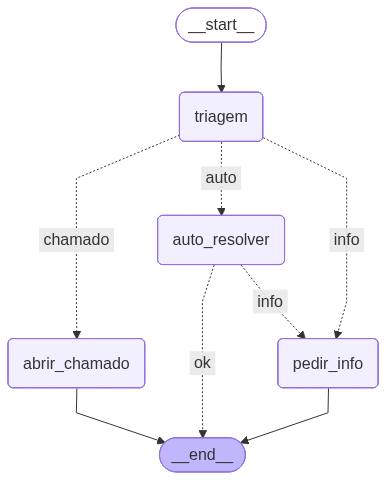

Imagem do grafo salva como 'grafo.png'. Você pode baixá-la se quiser.


In [66]:
from IPython.display import display, Image

# Gera a imagem do grafo em formato PNG
graph_bytes = grafo.get_graph().draw_mermaid_png()

# Exibe a imagem no notebook
display(Image(graph_bytes))

# Salva a imagem como arquivo PNG
with open("grafo.png", "wb") as f:
    f.write(graph_bytes)

print("Imagem do grafo salva como 'grafo.png'. Você pode baixá-la se quiser.")



In [67]:
testes = [
    "Este é um currículo profissional. Qual é o nome completo da pessoa?",
    "Este é um currículo profissional. Qual é a formação acadêmica apresentada?",
    "Este é um currículo profissional. Quais experiências profissionais estão listadas?",
    "Este é um currículo profissional. Quais habilidades ou competências são destacadas?",
    "Este é um currículo profissional. Quantos anos de experiência a pessoa possui?",
    "Este é um currículo profissional. Há alguma informação sobre idiomas ou certificações?"
]


In [68]:
for msg_test in testes:
    resposta_final = grafo.invoke({
        "pergunta": msg_test,
        "documento": "CURRICULO 07 DE SETEMBRO - ULTIMO.pdf",
        "forcar_no": "AUTO_RESOLVER"
    })

    print(f"PERGUNTA: {msg_test}")
    print(f"DECISÃO: {resposta_final.get('triagem', {}).get('decisao')} | URGÊNCIA: {resposta_final.get('triagem', {}).get('urgencia')} | AÇÃO FINAL: {resposta_final.get('acao_final')}")
    print(f"RESPOSTA: {resposta_final.get('resposta')}")

    if resposta_final.get("citacoes"):
        print("CITAÇÕES:")
        for citacao in resposta_final["citacoes"]:
            print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
            print(f"   Trecho: {citacao['trecho']}")

    print("------------------------------------")



Executando nó de triagem...
Decidindo após a triagem...
Executando nó de auto_resolver...
Decidindo após o auto_resolver...
Rag com sucesso, finalizando o fluxo.
PERGUNTA: Este é um currículo profissional. Qual é o nome completo da pessoa?
DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: None
RESPOSTA: Alessandra Cardozo dos Santos
------------------------------------
Executando nó de triagem...
Decidindo após a triagem...
Executando nó de auto_resolver...
Decidindo após o auto_resolver...
Rag com sucesso, finalizando o fluxo.
PERGUNTA: Este é um currículo profissional. Qual é a formação acadêmica apresentada?
DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: None
RESPOSTA: A formação acadêmica apresentada no currículo é:

*   Certificação Oracle foundations Associate (07/2025 - 08/2025)
*   Imersão Cloud Devops (07/2025 - 07/2025)
*   Jornada de Certificação OCI Foundation Associate (07/2025 - 07/2025)
*   Formação IA Generativa (05/2025 - 05/2025)
*   Imersão IA 3 Edição (

In [70]:
for msg_test in testes:
    resposta_final = grafo.invoke({
        "pergunta": msg_test,
        "documento": "CURRICULO 07 DE SETEMBRO - ULTIMO.pdf",
        "forcar_no": "AUTO_RESOLVER"
    })

    print(f"PERGUNTA: {msg_test}")
    print(f"DECISÃO: {resposta_final.get('triagem', {}).get('decisao')} | URGÊNCIA: {resposta_final.get('triagem', {}).get('urgencia')} | AÇÃO FINAL: {resposta_final.get('acao_final')}")
    print(f"RESPOSTA: {resposta_final.get('resposta')}")

    if resposta_final.get("citacoes"):
        print("CITAÇÕES:")
        for citacao in resposta_final["citacoes"]:
            print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
            print(f"   Trecho: {citacao['trecho']}")

    print("------------------------------------")

Executando nó de triagem...
Decidindo após a triagem...
Executando nó de auto_resolver...
Decidindo após o auto_resolver...
Rag com sucesso, finalizando o fluxo.
PERGUNTA: Este é um currículo profissional. Qual é o nome completo da pessoa?
DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: None
RESPOSTA: Alessandra Cardozo dos Santos
------------------------------------
Executando nó de triagem...
Decidindo após a triagem...
Executando nó de auto_resolver...
Decidindo após o auto_resolver...
Rag com sucesso, finalizando o fluxo.
PERGUNTA: Este é um currículo profissional. Qual é a formação acadêmica apresentada?
DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: None
RESPOSTA: A formação acadêmica apresentada no currículo é:

*   **Certificação Oracle foundations Associate** (07/2025 - 08/2025)
*   **Imersão Cloud Devops** (07/2025 - 07/2025)
*   **Jornada de Certificação OCI Foundation Associate** (07/2025 - 07/2025)
*   **Formação IA Generativa** (05/2025 - 05/2025)
*   **Ime

A saída acima demonstra como, dada uma pergunta, o sistema primeiro busca as partes relevantes no seu documento PDF e, em seguida, usa essas partes para gerar uma resposta informada, citando as fontes originais. Isso é o cerne do Retrieval Augmented Generation (RAG)!